<a href="https://colab.research.google.com/github/luasampaio/data-engineering/blob/main/24_Pandas_Snowflake_Connector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*texto em itálico*## **Initial Setup**

In [ ]:
#requirements:
# - Python >= 3.6
!pip install "snowflake-connector-python[pandas]"

Snowflake Pandas connector helps you create your analysis by using the most famous pandas dataframe. In the next steps we'll guide you through how to setup your pandas to work with snowflake.

We would like to show you an image that refers to the datatype mapping from snowflake to pandas:
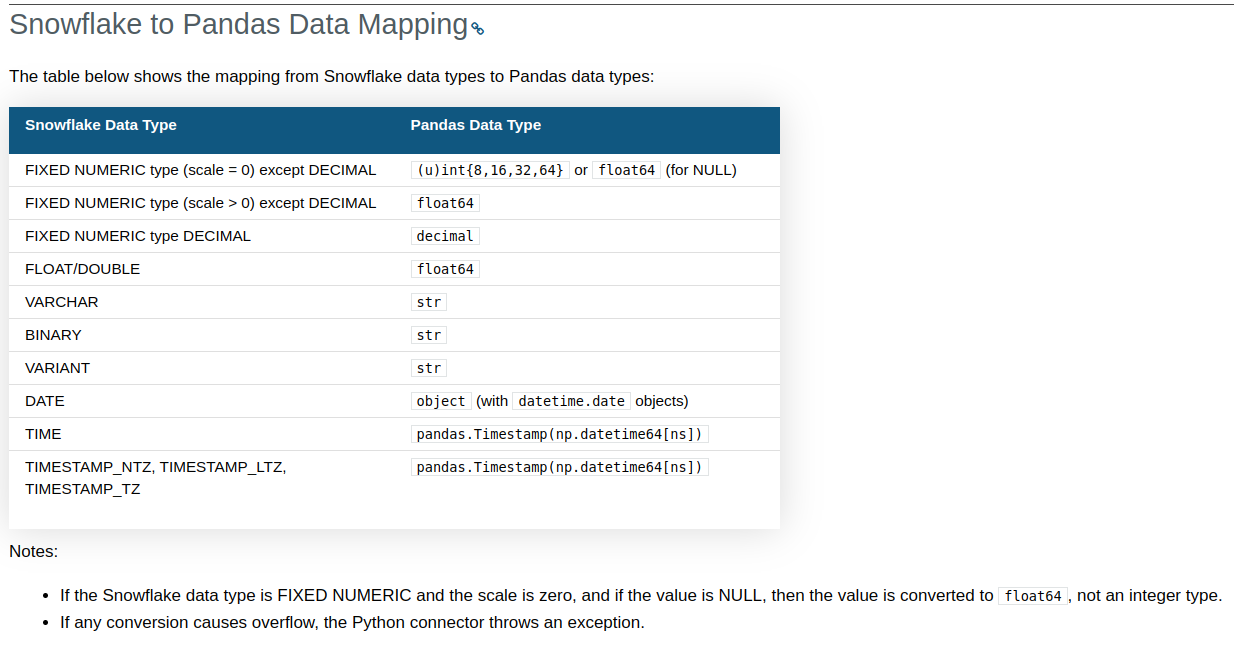




In [ ]:
import snowflake.connector

In [ ]:
# fill in your snowflake params
params = {
    "user": "<your_snowflake_user>",
    "password": "<your_password>",
    "account": "<your_account_id>",#don't forget to put your region. e.g: account_id.us-east-1
    "warehouse": "COMPUTE_WH",
    "database": "<your_database_name>",
    "schema": "PUBLIC",
}

In [ ]:
#create a connection and a session for your cursor
conn = snowflake.connector.connect(**params)
cur = conn.cursor()

In [ ]:
#create your sql command and transform it in a pandas dataframe
#As you already have your schema configured, you can just run sql without specifying any schema.
#But, if you need to perform SQL queries in another schema you can just use the following EXAMPLE: SELECT * FROM <database>.<schema>.<table>
sql = 'SELECT * FROM HEALTHLAKE.PUBLIC._VACINAS_DO_ESP_RITO_SANTO LIMIT 100'
df = cur.execute(sql).fetch_pandas_all()

NameError: ignored

In [ ]:
#now you can just use it as a pandas dataframe
df.shape

(100, 34)

In [ ]:
df.head()

,DOCUMENT_ID,PACIENTE_ID,PACIENTE_IDADE,PACIENTE_DATANASCIMENTO,PACIENTE_ENUMSEXOBIOLOGICO,PACIENTE_RACACOR_CODIGO,PACIENTE_RACACOR_VALOR,PACIENTE_ENDERECO_COIBGEMUNICIPIO,PACIENTE_ENDERECO_COPAIS,PACIENTE_ENDERECO_NMMUNICIPIO,...,VACINA_LOTE,VACINA_FABRICANTE_NOME,VACINA_FABRICANTE_REFERENCIA,VACINA_DATAAPLICACAO,VACINA_DESCRICAO_DOSE,VACINA_CODIGO,VACINA_NOME,SISTEMA_ORIGEM,DATA_IMPORTACAO_RNDS,ID_SISTEMA_ORIGEM
0,f9907e46-621a-4ac1-992d-59fdf5ae26cb-i0b0,7d1c5e46ce3da4d69188bad28f76794237a1e3947df452...,28,1992-09-16,F,01,BRANCA,320130,10,CARIACICA,...,202010018,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-01,1ÂªÂ Dose,86.0,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-01 14:09:51,16341.0
1,59772fbd-cd52-494e-bde3-bb8585eac2a9-i0b0,ab992f324c42c1ca1eca00d2b15eb6e0e163ff8368bafa...,29,1992-02-24,M,01,BRANCA,320370,10,MUNIZ FREIRE,...,28230BD,PFIZER MANUFACTURING BELGIUM NV - BELGICA,None,2021-08-19,1ÂªÂ Dose,87.0,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,VACINA E CONFIA ES,2021-08-24 17:31:42,21955.0
2,10d761f7-6746-47d4-8f82-ff466ceb11dd-i0b0,72aad6df7aee4def12350352b9df623e810ecbff9a1bd3...,52,1968-11-11,F,01,BRANCA,320450,10,SANTA LEOPOLDINA,...,214VCD055W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-18,1ÂªÂ Dose,85.0,Vacina Covid-19 - Covishield,Novo PNI,2021-05-25 16:57:40,16341.0
3,639ea0ca-4979-45c9-9c2d-3601de267004-i0b0,151939921098730953ccd52a918aa6f18473ae4c012a75...,51,1970-06-05,M,03,PARDA,270830,10,SAO JOSE DA LAJE,...,217VCD228Z,FUNDACAO OSWALDO CRUZ,None,2021-08-24,1ÂªÂ Dose,85.0,Vacina Covid-19 - Covishield,VACINA E CONFIA ES,2021-08-24 15:54:13,21955.0
4,7bbcb366-f065-4faf-8e18-53ab41d0e8a4-i0b0,47e426ab60e62647b686a4c27912681522adfebf987be9...,38,1982-07-29,F,03,PARDA,320130,10,CARIACICA,...,FA9094,MINISTERIO DA SAUDE,Organization/00394544000851,2021-07-10,1ÂªÂ Dose,87.0,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-07-10 18:22:57,16341.0


In [ ]:
df.sort_values(by="PACIENTE_IDADE").head()

,DOCUMENT_ID,PACIENTE_ID,PACIENTE_IDADE,PACIENTE_DATANASCIMENTO,PACIENTE_ENUMSEXOBIOLOGICO,PACIENTE_RACACOR_CODIGO,PACIENTE_RACACOR_VALOR,PACIENTE_ENDERECO_COIBGEMUNICIPIO,PACIENTE_ENDERECO_COPAIS,PACIENTE_ENDERECO_NMMUNICIPIO,...,VACINA_LOTE,VACINA_FABRICANTE_NOME,VACINA_FABRICANTE_REFERENCIA,VACINA_DATAAPLICACAO,VACINA_DESCRICAO_DOSE,VACINA_CODIGO,VACINA_NOME,SISTEMA_ORIGEM,DATA_IMPORTACAO_RNDS,ID_SISTEMA_ORIGEM
11,7fd62de0-9dd0-4766-b645-ce627c9e9107-i0b0,61896c04600f2366b16b917ba5b49c0df4f4346305c72a...,18,2003-07-24,F,03,PARDA,320530,10,VITORIA,...,FD7208,PFIZER MANUFACTURING BELGIUM NV - BELGICA,None,2021-08-24,1ÂªÂ Dose,87.0,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,VACINA E CONFIA ES,2021-08-24 18:27:00,21955.0
32,245dcbcb-aae1-4b83-964a-6540d871eba7-i0b0,c9eb812f2a13532fcc114567b50fc8b19048e0ca116e2f...,18,2002-12-31,M,01,BRANCA,350970,10,CAMPOS DO JORDAO,...,210335,INSTITUTO BUTANTAN,None,2021-08-06,1ÂªÂ Dose,86.0,Covid-19-Coronavac-Sinovac/Butantan,VACINA E CONFIA ES,2021-08-12 10:56:20,21955.0
94,8646890a-b166-4863-bfac-5b3ebba8266e-i0b0,78b4272f155e6107b6f76c81ee750ecb76ecc0b8c65b85...,18,2003-05-14,M,04,AMARELA,320350,10,MONTANHA,...,FD7210,PFIZER MANUFACTURING BELGIUM NV - BELGICA,None,2021-08-21,1ÂªÂ Dose,87.0,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,VACINA E CONFIA ES,2021-08-24 17:27:21,21955.0
88,4d56d051-4aed-43b8-84f8-421d974cc363-i0b0,a927dd06bbf3fb4c12ce1e270afaf48e913907cbabcbb3...,18,2003-06-22,F,03,PARDA,320320,10,LINHARES,...,28230BD,PFIZER MANUFACTURING BELGIUM NV - BELGICA,None,2021-08-24,1ÂªÂ Dose,87.0,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,VACINA E CONFIA ES,2021-08-24 15:28:51,21955.0
75,872369dd-ef9e-4930-9246-699e20fbacf4-i0b0,dd5e5d296f8b6241a5c82acddb19a94c0465f1089da449...,18,2003-03-29,F,01,BRANCA,320332,10,MARATAIZES,...,217VCD235Z,FUNDACAO OSWALDO CRUZ,None,2021-08-21,1ÂªÂ Dose,85.0,Vacina Covid-19 - Covishield,VACINA E CONFIA ES,2021-08-24 17:36:59,21955.0


## **Other ways of creating a pandas dataframe**

In [ ]:
import pandas as pd
#you can also use other sql statement
sql = 'SELECT * FROM HEALTHLAKE.PUBLIC._VACINAS_DO_ESP_RITO_SANTO LIMIT 100'
cur.execute(sql)
dat = cur.fetchall()

In [ ]:
new_columns = [column.name for column in cur.description]
df = pd.DataFrame(dat, columns=new_columns)

In [ ]:
df.head()

,DOCUMENT_ID,PACIENTE_ID,PACIENTE_IDADE,PACIENTE_DATANASCIMENTO,PACIENTE_ENUMSEXOBIOLOGICO,PACIENTE_RACACOR_CODIGO,PACIENTE_RACACOR_VALOR,PACIENTE_ENDERECO_COIBGEMUNICIPIO,PACIENTE_ENDERECO_COPAIS,PACIENTE_ENDERECO_NMMUNICIPIO,...,VACINA_LOTE,VACINA_FABRICANTE_NOME,VACINA_FABRICANTE_REFERENCIA,VACINA_DATAAPLICACAO,VACINA_DESCRICAO_DOSE,VACINA_CODIGO,VACINA_NOME,SISTEMA_ORIGEM,DATA_IMPORTACAO_RNDS,ID_SISTEMA_ORIGEM
0,f9907e46-621a-4ac1-992d-59fdf5ae26cb-i0b0,7d1c5e46ce3da4d69188bad28f76794237a1e3947df452...,28,1992-09-16,F,01,BRANCA,320130,10,CARIACICA,...,202010018,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-01,1ÂªÂ Dose,86.0,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-01 14:09:51,16341.0
1,59772fbd-cd52-494e-bde3-bb8585eac2a9-i0b0,ab992f324c42c1ca1eca00d2b15eb6e0e163ff8368bafa...,29,1992-02-24,M,01,BRANCA,320370,10,MUNIZ FREIRE,...,28230BD,PFIZER MANUFACTURING BELGIUM NV - BELGICA,None,2021-08-19,1ÂªÂ Dose,87.0,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,VACINA E CONFIA ES,2021-08-24 17:31:42,21955.0
2,10d761f7-6746-47d4-8f82-ff466ceb11dd-i0b0,72aad6df7aee4def12350352b9df623e810ecbff9a1bd3...,52,1968-11-11,F,01,BRANCA,320450,10,SANTA LEOPOLDINA,...,214VCD055W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-18,1ÂªÂ Dose,85.0,Vacina Covid-19 - Covishield,Novo PNI,2021-05-25 16:57:40,16341.0
3,639ea0ca-4979-45c9-9c2d-3601de267004-i0b0,151939921098730953ccd52a918aa6f18473ae4c012a75...,51,1970-06-05,M,03,PARDA,270830,10,SAO JOSE DA LAJE,...,217VCD228Z,FUNDACAO OSWALDO CRUZ,None,2021-08-24,1ÂªÂ Dose,85.0,Vacina Covid-19 - Covishield,VACINA E CONFIA ES,2021-08-24 15:54:13,21955.0
4,7bbcb366-f065-4faf-8e18-53ab41d0e8a4-i0b0,47e426ab60e62647b686a4c27912681522adfebf987be9...,38,1982-07-29,F,03,PARDA,320130,10,CARIACICA,...,FA9094,MINISTERIO DA SAUDE,Organization/00394544000851,2021-07-10,1ÂªÂ Dose,87.0,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-07-10 18:22:57,16341.0


# **Saving your results back to snowflake**

In [ ]:
from snowflake.connector.pandas_tools import write_pandas

In [ ]:
#This SQL statement creates an empty copy of your table to save your work. Just remember that your
#table schema must match your pandas df output. If you want to create more columns in your current dataframe
#don't forget to create the same column in your snowflake table
sql = 'CREATE TABLE IF NOT EXISTS TEST_PANDAS LIKE _VACINAS_DO_ESP_RITO_SANTO'
cur.execute(sql)

In [ ]:
#do some transformations with your data
df['VACINA_FABRICANTE_NOME'].replace(" ", "_", regex=True, inplace=True)

In [ ]:
#Save data to your snowflake table. By default this method will append data to the end of your table
write_pandas(conn, df, 'TEST_PANDAS')

(True,
 1,
 100,
 [('rnicu/file0.txt', 'LOADED', 100, 100, 1, 0, None, None, None, None)])